## Probability of HSV1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import binom

In [2]:
n = 25
size = 1

In [3]:
# Generate the survival function for n ranges
# sf  = 1-cdf

In [15]:
sfs_hsv1_high = []
sfs_hsv1_low = []
sfs_hsv1_low_q = []
for i in range(n):
    y_high = binom.sf(0, i, 0.67)
    y_low = binom.sf(0, i, 0.80)
    sfs_hsv1_low.append(y_low)
    sfs_hsv1_high.append(y_high)
    sfs_hsv1_low_q.append(1-(1-0.8)**i)
    
sfs_hsv1_low = np.array(sfs_hsv1_low)
sfs_hsv1_high = np.array(sfs_hsv1_high)

In [16]:
sfs_hsv1_low_q

[0.0,
 0.8,
 0.96,
 0.992,
 0.9984,
 0.99968,
 0.999936,
 0.9999872,
 0.99999744,
 0.999999488,
 0.9999998976,
 0.99999997952,
 0.999999995904,
 0.9999999991808,
 0.99999999983616,
 0.999999999967232,
 0.9999999999934464,
 0.9999999999986893,
 0.9999999999997379,
 0.9999999999999476,
 0.9999999999999896,
 0.9999999999999979,
 0.9999999999999996,
 0.9999999999999999,
 1.0]

In [17]:
sfs_hsv1_low

array([0.        , 0.8       , 0.96      , 0.992     , 0.9984    ,
       0.99968   , 0.999936  , 0.9999872 , 0.99999744, 0.99999949,
       0.9999999 , 0.99999998, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [211]:
# P exposed to and aquire
#𝑃(𝐴𝐵)=𝑃(𝐴)⋅𝑃(𝐵|𝐴)
# per contact 0.6/1000

In [212]:
transmission_rate = 0.6/1000 
sfs_high_1_contract = []
sfs_high_10_contract = []
sfs80_100_contract = []
for i in range(n):
    y_80_1 = binom.sf(1, i, 0.80 * transmission_rate)
    y_80_10 = binom.sf(1, i, 0.80 * transmission_rate * 10)
    y_80_100 = binom.sf(1, i, 0.80 * transmission_rate * 100)
    sfs80_1_contract.append(y_80_1)
    sfs80_10_contract.append(y_80_10)
    sfs80_100_contract.append(y_80_100)

sfs80_1_contract = np.array(sfs80_1_contract)
sfs80_10_contract = np.array(sfs80_10_contract)
sfs80_100_contract = np.array(sfs80_100_contract)

In [213]:
x = np.arange(0, n)
df = pd.DataFrame({"Contacts": x, "P(Exposure)=0.67": sfs67, "P(Exposure)=0.80": sfs80, "P(Contract|1 Act)": sfs80_1_contract, "P(Contract|10 Acts)": sfs80_10_contract, "P(Contract|100 Acts)": sfs80_100_contract})
df.set_index("Contacts")
df.describe()

ValueError: All arrays must be of the same length

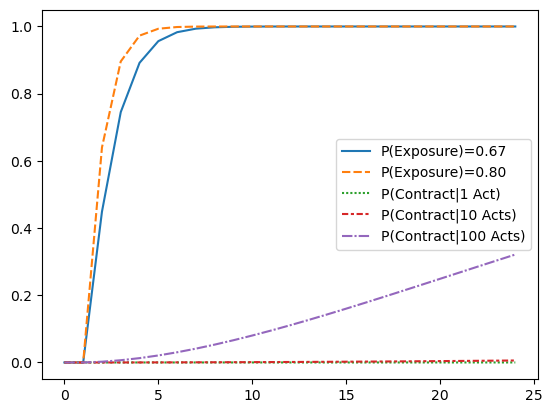

In [178]:
sns.lineplot(df[["P(Exposure)=0.67", "P(Exposure)=0.80", "P(Contract|1 Act)", "P(Contract|10 Acts)", "P(Contract|100 Acts)"]])
plt.show()

In [179]:
# Rapid asymptotic convergence to 1
# How little impact the probability reduction has
# Probability of contraction remains exceedingly low

## Probability of HSV2

In [202]:
n = 50
size = 1

In [203]:
sfs12 = []
for i in range(n):
    y12 = binom.sf(1, i, 0.121)
    sfs12.append(y12)
    
sfs12 = np.array(sfs12)

In [204]:
transmission_rate = 0.6/1000 
sfs12_1_contract = []
sfs12_10_contract = []
sfs12_100_contract = []
for i in range(n):
    y_12_1 = binom.sf(1, i, 0.12 * transmission_rate)
    y_12_10 = binom.sf(1, i, 0.12 * transmission_rate * 10)
    y_12_100 = binom.sf(1, i, 0.12 * transmission_rate * 100)
    sfs12_1_contract.append(y_12_1)
    sfs12_10_contract.append(y_12_10)
    sfs12_100_contract.append(y_12_100)

sfs12_1_contract = np.array(sfs12_1_contract)
sfs12_10_contract = np.array(sfs12_10_contract)
sfs12_100_contract = np.array(sfs12_100_contract)

In [205]:
x = np.arange(0, n)
df = pd.DataFrame({"Contacts": x, "P(Exposure)=0.12": sfs12, "P(Contract|1 Act)": sfs12_1_contract, "P(Contract|10 Acts)": sfs12_10_contract, "P(Contract|100 Acts)": sfs12_100_contract})
df.set_index("Contacts")
df.describe()

,Contacts,P(Exposure)=0.12,P(Contract|1 Act),P(Contract|10 Acts),P(Contract|100 Acts)
count,50.00000,50.000000,5.000000e+01,50.000000,50.000000
mean,24.50000,0.671746,2.028693e-06,0.008077,0.327684
std,14.57738,0.329916,1.874031e-06,0.007253,0.228070
min,0.00000,0.000000,0.000000e+00,0.000000,0.000000
25%,12.25000,0.446448,3.575195e-07,0.001538,0.114557
50%,24.50000,0.814251,1.491379e-06,0.006175,0.330191
75%,36.75000,0.946981,3.400210e-06,0.013552,0.532019
max,49.00000,0.986053,6.082648e-06,0.023339,0.688388


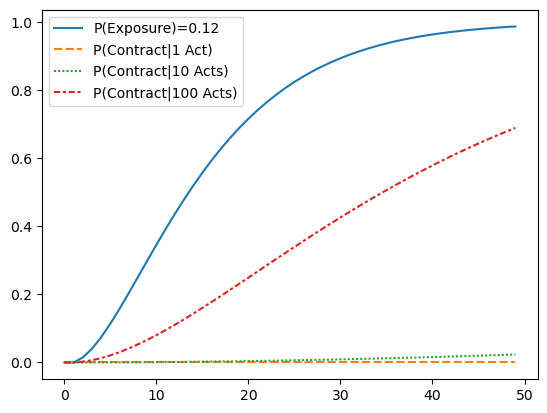

In [206]:
sns.lineplot(df[["P(Exposure)=0.12", "P(Contract|1 Act)", "P(Contract|10 Acts)", "P(Contract|100 Acts)"]])
plt.show()